# Project: Investigating No-show appointments dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.So based on the data of this dataset i have analysed some questions which i'll be answering using this dataset.Below are the questions.

##### Questions:
> 1. Does location of hospital is affecting the appointments? Are there some locations resulting in more appointments?
> 2. Does providing scholarship resulting in more appointments?
> 3. Does reminding through sms generating more appoinments ?
> 4. Does retired people(age>=66) showing up more for appointments as compared to younger people as they have more time compared      to working generation?
> 5. Does people are more conscious towards a particular disease and showing up for more appoinments?
> 6. Do female are showing up more as compared to males?
> 7. What are the factors by which we can predict if a patient will show up for a scheduled appointment?

> Let's start answering them one by one by first importing the dataset.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
%matplotlib inline

df=pd.read_csv("appoinment.csv")
df.head() 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='wrangling'></a>
## Data Wrangling



#### 1. Checking the datatype and missing entries

In [49]:
df.info()     
#So we can see there are 110527 entries and all columns have this much entries so there is no missing data. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hypertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### 2. Checking for unique values

In [9]:
df.nunique()    
#Here we can see that patientId has 61744 unique entries means rest of the entries are repeating

PatientId          61744
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hypertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

#### 3. Checking for duplicate values

In [32]:
sum(df['PatientId'].duplicated())

#Now as appointmentId are different i'm considering that patientid are same because after visiting the hospital patient
#got his/her patientId and when he/she comes back again to visit, the same patientId is used but appointmentId will be diff.
# So i'm not deleting the duplicate entries of patientId


48779

#### 4. Checking unique values of age column

In [11]:
df.Age.unique() 
# here we found that age is set -1 in some column which is not possible so have to see how many times it appear

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
      dtype=int64)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000199F14A43C8>,
      dtype=object)

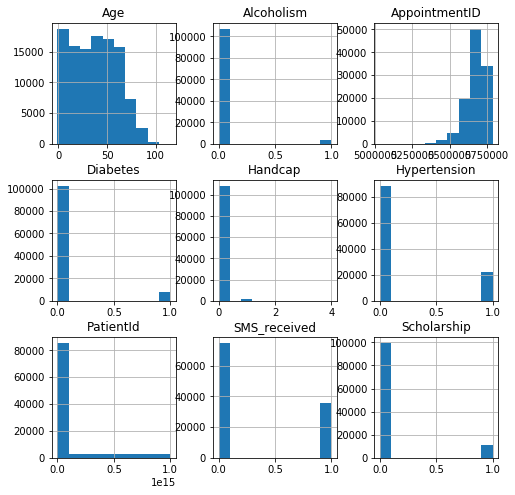

In [4]:
df.hist(figsize=(8,8))

> 1. From the **age** histogram we can see that most of the patients are young.
> 2. From the **alcoholism** histogram we can see that they are many few cases of alcoholism in Brazil, that's really gud. 

## Data Cleaning

> **After wrangling the data let's clean the invalid data. Below are the actions i'm going to take in this section**
> 1. I'm leaving the patientId column as it is
> 2. Cleaning the age column
> 3. Leaving rest of the columns unchanged as they all have relevant information.

In [5]:
df['Age'].value_counts() # Found that there is only column with age set to -1 so droping that column
df[df['Age']==-1]        # Row nuber 99832 contains that wrong age input

df.drop(df.index[99832],axis=0,inplace=True)     #dropped the rows with age =-1
df.shape                                         #checking the dimensions again
df['Age'].value_counts()                         #checking again it is removed, and yes it is removed

0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 103, dtype: int64

##### We have also seen above that age=0 but i'm assuming it as this data is of patients and age=0 might be for infants who are less than 1 year old so leaving the data as it is.



<a id='eda'></a>
## Exploratory Data Analysis

>Now as we have prepared our questions , wrangle the data and also cleaned it so let's now try to answer the question one by one using summary statistics and visualization .

### Q1. Does location of hospital is affecting the appointments? Are there some locations resulting in more appointments?

>**Ans**. To answer this let's first calculate the total number of show ups from each location

In [43]:
appointment=df.groupby('Neighbourhood').count()['Age']
appointment

# We got number of appointments from each location

Neighbourhood
AEROPORTO                 8
ANDORINHAS             2262
ANTÔNIO HONÓRIO         271
ARIOVALDO FAVALESSA     282
BARRO VERMELHO          423
                       ... 
SÃO JOSÉ               1977
SÃO PEDRO              2448
TABUAZEIRO             3132
UNIVERSITÁRIO           152
VILA RUBIM              851
Name: Age, Length: 81, dtype: int64

In [46]:
# We divide the dataset to obtain the number of show ups from each location.

show_up=df.groupby(['No-show','Neighbourhood']).count()['Age']
show_up['No']            # No means showing up for appointment

Neighbourhood
AEROPORTO                 7
ANDORINHAS             1741
ANTÔNIO HONÓRIO         221
ARIOVALDO FAVALESSA     220
BARRO VERMELHO          332
                       ... 
SÃO JOSÉ               1549
SÃO PEDRO              1933
TABUAZEIRO             2559
UNIVERSITÁRIO           120
VILA RUBIM              710
Name: Age, Length: 80, dtype: int64

In [61]:
# now we divide the no.of show ups with total no. of appointments to get the proportion.

prop=show_up['No']/appointment
prop_per=prop*100                 #multiplying it with 100 to get it in %age.
prop_per.mean()

80.45018679653623

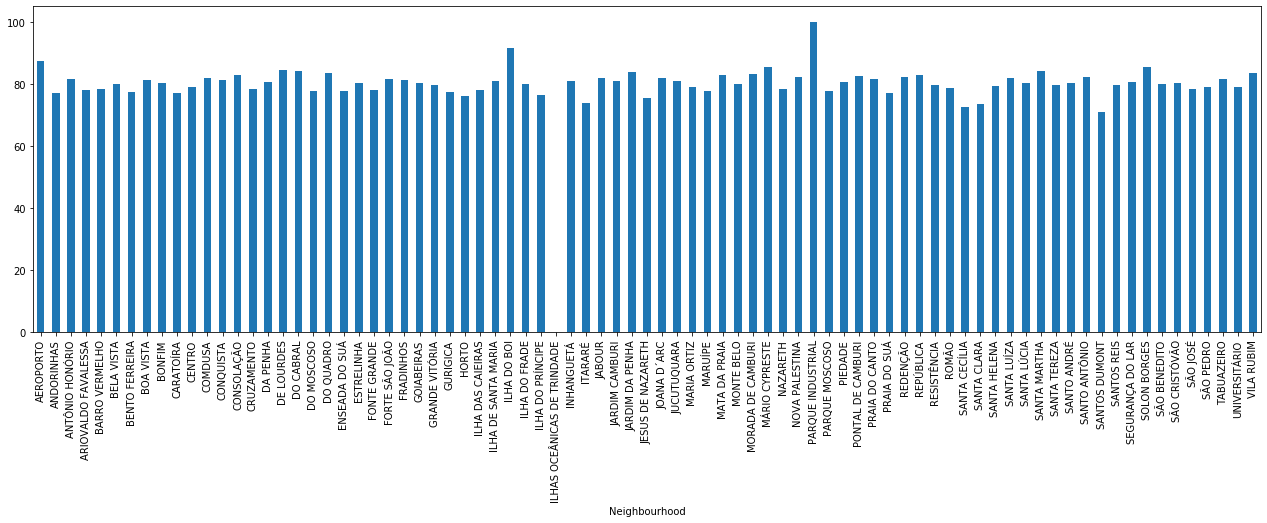

In [59]:
prop_per.plot(kind='bar',figsize=(22,6))

### Q2. Does providing scholarship resulting in more appointments?

In [3]:
# First let's count how many students got scholarship
# Assuming 0 means didn't get and 1 means get.

total=df.groupby('Scholarship').count()['Age']
total

Scholarship
0    99666
1    10861
Name: Age, dtype: int64

In [4]:
#Here we are finding patients who got scholarship and show up for the appointment.

scholar=df.groupby(['No-show','Scholarship']).count()['Age']
scholar

No-show  Scholarship
No       0              79925
         1               8283
Yes      0              19741
         1               2578
Name: Age, dtype: int64

In [5]:
# Finding %age of patients who got scholarship and show up for appointment.
prop_sch=scholar['No'][1]/total[1]
prop_sch_per=prop_sch*100
prop_sch_per

# Finding %age of patients who didn't get scholarship still appear for appointment.
prop_schnot=scholar['No'][0]/total[0]
prop_schnot_per=prop_schnot*100
prop_schnot_per

80.19284409929163

Text(0.5, 0, 'Scholarship')

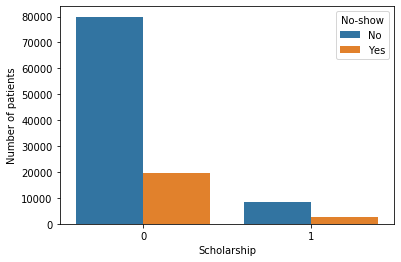

In [12]:
# Visualizing the result through clustered bar garph
sb.countplot(data=df, x='Scholarship', hue='No-show')
plt.ylabel('Number of patients')
plt.xlabel('Scholarship')

### Q3. Does reminding through sms generating more appoinments ?

In [18]:
# Grouping the the no of patients who got sms and who didn't get sms
sms_status=df.groupby(['SMS_received','No-show']).count()['Age']
sms_status

SMS_received  No-show
0             No         62510
              Yes        12535
1             No         25698
              Yes         9784
Name: Age, dtype: int64

In [19]:
# COunting the total no of patients who get and didn't get sms
total_ysms=sms_status[1]['No'] + sms_status[1]['Yes']
total_nsms=sms_status[0]['No'] + sms_status[0]['Yes']

In [20]:
# Calculating the no of %age
prop_ysms=sms_status[1]['No']/total_ysms
prop_ysms_per=prop_ysms*100

prop_nsms=sms_status[0]['No']/total_nsms
prop_nsms_per=prop_nsms*100

In [14]:
# Visualizing the result through heatmap
ct_counts= df.groupby(['SMS_received','No-show']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index = 'No-show', columns = 'SMS_received', values = 'count')


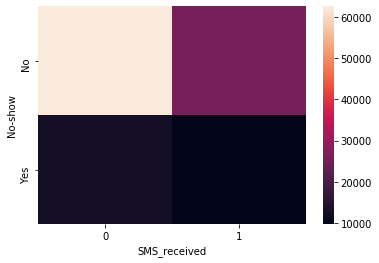

In [15]:
sb.heatmap(ct_counts)

### Q4. Does retired people(age>=66) showing up more for appointments as compared to younger people as they have more time compared to working generation?

In [110]:
# First let's differentiate the people 

retired_pat=df.query('Age >= 66')
young_pat=df.query('Age < 66')

13301

In [146]:
# counting the total no of show ups for each category of people

show_ret=retired_pat.groupby('No-show').count()['Age']
show_young=young_pat.groupby('No-show').count()['Age']

In [147]:
# Calculating the proportion for each category

prop_ret=show_ret['No']/retired_pat.count()['Age']
prop_ret_per=prop_ret*100

prop_young=show_young['No']/young_pat.count()['Age']
prop_young_per=prop_young*100

Text(0.5, 0, 'Retired People Vs Young people')

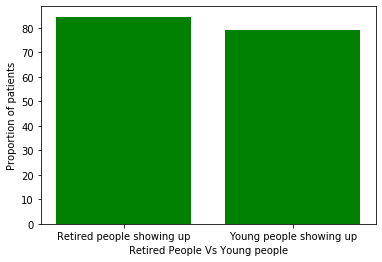

In [148]:
# Visualizing it through bar chart

locations=[1,2]
heights=[prop_ret_per,prop_young_per]
labels=['Retired people showing up','Young people showing up']
plt.scatter(locations,heights,color='g',tick_label=labels)
plt.ylabel('Proportion of patients')
plt.xlabel('Retired People Vs Young people')

### Q5. Do female are showing up more as compared to males?

In [54]:
df_f=df.query('Gender == "F"')
df_m=df.query('Gender == "M"')

In [87]:
sms_f=df_f.groupby('SMS_received').count()['Age']
total_f=sms_f[1]

f=df_f.groupby(['SMS_received','No-show']).count()['Age']

prop_f=f[1]['No']/total_f
prop_f_per=prop_f*100
prop_f_per

72.23369969424014

In [124]:
sms_m=df_m.groupby('SMS_received').count()['Age']
total_m=sms_m[1]

m=df_m.groupby(['SMS_received','No-show']).count()['Age']

prop_m=m[1]['No']/total_m
prop_m_per=prop_m*100
prop_m_per

72.83687943262412

In [98]:
sch_f=df_f.groupby('Scholarship').count()['Age']
total_sch_f=sch_f[1]

f_sch=df_f.groupby(['Scholarship','No-show']).count()['Age']

prop_sch_f=f_sch[1]['No']/total_sch_f
per_f=prop_sch_f*100

76.2114537444934

In [123]:
sch_m=df_m.groupby('Scholarship').count()['Age']
total_sch_m=sch_m[1]

m_sch=df_m.groupby(['Scholarship','No-show']).count()['Age']

prop_sch_m=m_sch[1]['No']/total_sch_m
per_m=prop_sch_m*100
per_m

76.49402390438247

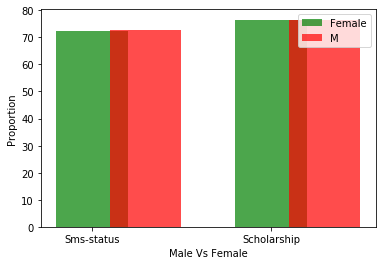

In [128]:
location_f=[1,2]
location_m=[1.3,2.3]
height_f=[prop_f_per,per_f]
height_m=[prop_m_per,per_m]
labels=['Sms-status','Scholarship']
plt.bar(location_f,height_f,color='g',width=.4,alpha=.7,label='Female')
plt.bar(location_m,height_m,color='r',width=.4,alpha=.7,label='M')
plt.ylabel('Proportion')
plt.xlabel('Male Vs Female')
plt.xticks(location,labels)
plt.legend()
plt.show()

### Q6.Does people are more conscious towards a particular disease and showing up for more appoinments?

In [130]:
dia=df.groupby(['No-show','Diabetes']).count()['Age']
total=dia['No'][1] + dia['Yes'][1]
came=dia['No'][1]

In [131]:
prop_dia=came/total
prop_dia_per=prop_dia*100
prop_dia_per

81.99672667757774

In [132]:
hyper=df.groupby(['No-show','Hypertension']).count()['Age']
total_hyper=hyper['No'][1] + hyper['Yes'][1]
came_hyper=hyper['No'][1]

In [133]:
prop_hyper=came_hyper/total_hyper
prop_hyper_per=prop_hyper*100
prop_hyper_per

82.69804137424889

In [134]:
alcohol=df.groupby(['No-show','Alcoholism']).count()['Age']
total_alcohol=alcohol['No'][1] + alcohol['Yes'][1]
came_alcohol=alcohol['No'][1]

In [135]:
prop_alcohol=came_alcohol/total_alcohol
prop_alcohol_per=prop_alcohol*100
prop_alcohol_per

79.85119047619048

In [136]:
handcap=df.groupby(['No-show','Handcap']).count()['Age']
total_handcap=handcap['No'][1] + handcap['No'][2] + handcap['No'][3] + handcap['No'][4] + handcap['Yes'][1] + handcap['Yes'][2] + handcap['Yes'][3] + handcap['Yes'][4]
handcap_came=handcap['No'][1] + handcap['No'][2] + handcap['No'][3] + handcap['No'][4]

In [137]:
prop_handcap=handcap_came/total_handcap
prop_handcap_per=prop_handcap*100
prop_handcap_per

81.83846497099509

Text(0.5, 0, 'Various Diseases')

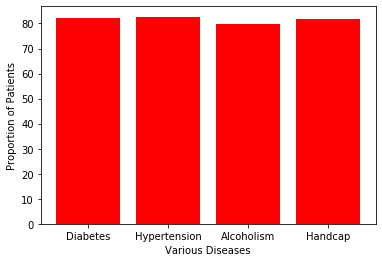

In [141]:
locations=[1,2,3,4]
heights=[prop_dia_per,prop_hyper_per,prop_alcohol_per,prop_handcap_per]
labels=['Diabetes','Hypertension','Alcoholism','Handcap']
plt.bar(locations,heights,color='r',tick_label=labels)
plt.ylabel('Proportion of Patients')
plt.xlabel('Various Diseases')

### Q6.What are the factors by which we can predict if a patient will show up for a scheduled appointment?

> As we see that **location ,reminding through sms,scholarships** doesn't matter when the people are conscious about their health they will definitely show up for their appointment.So according to my analysis of this data there are no such particulars parameters by which we can predict.However as we see that participation of retired people is more so we can do something for them that will benefit them and increase their participation.

<a id='conclusions'></a>
## Conclusions

> **Finding 1:** From the above bar graph of **Q1** we see that location does not matter at all in showing up for appointments. As we can see that the mean of all proportions is 80.45 i.e if a patient books an appointment then there is 80% chance that he/she will show up or we can say that 8 out of every 10 patients show up for the booked appointments irrespective of the location of hospital.However *Parque Industrial* location shows that 10 out of every 10 patients show up for the appointments.

>**Finding 2:** After seeing the above graph of **Q2** 76 patients out of every 100 patients who got scholarship show up for the appointment and *surprisingly* 80 patients out of every 100 patients who didn't get scholarship show up for the appointment.Thus we can say that scholarship dosen't really matter when it comes to the health of a person.

> **Finding 3:** So another shocking insight from the graph of **Q3**, it was expected that reminding through sms may generate more appointment visits but here opposite is happening. Percentage of patients who didn't get sms, showing up for more appointments as compared to the pateints who got sms.Thus when a person is conscious about himself/herself health he/she don't require reminders.

>**Finding 4:** This is what we expect from the graph of **Q4** as retired people have more time so it was expected that they will be more in number as compared to working generation whose greatest wealth is time and bar chart tells the same story.

>**Finding 5:** Through the graph of **Q5** we can say that all diseases meant equally to the patients and they don't take any of the disease lightly however there is a slight increase in the hypertension showing up %age thus we can conclude all the types of diseases mentioned in the dataset meant equally to the patients.


>**Conclusion:** As we see that **location ,reminding through sms,scholarships** doesn't matter when the people are conscious about their health they will definitely show up for their appointment.So according to my analysis of this data there are no such particulars parameters by which we can predict.However as we see that participation of retired people is more so we can do something for them that will benefit them and further increase their participation.

>**Limitation:** From the conclusion we conclude that location, reminding through sms, scholarships are not showing much differences due to this they have very less effect on number of patients showing up for appointments.Maybe data is not accurate that is why there are no such differences so this is the limitation that i didn't find any good differences between them.